# A Study with Open Access Series of Imaging Studies (OASIS) Longitudinal dataset: Evaluating the performance of Machine Learning models in Classifying 'Demented' and 'Non-Demented' Subjects

Dementia, a syndrome characterized by cognitive impairment and memory loss, presents a significant public health challenge worldwide. Early and accurate diagnosis of dementia is crucial for effective treatment and intervention. Machine learning has been regarded as one of the way to hasten and support diagnosis. This study leverages on available **longitudinal** OASIS dataset found on Kaggle, thanks to Jacob Boysen, and evaluates the performance of 3 popular machine learning models, Random Forest, Multi-layer Perceptron (MLP), and XGBoost before and after hyperparameter, in a binary classification task: whether a subject has dementia or not.


## Variable Description
1. Subject ID - Subject Identification (i.e. OAS2_0001)
2. MRI ID - MRI Exam Identification (i.e. OAS2_0001_MR1)
3. Group - Class (i.e. Demented, Nondemented)
4. Visit - Number of visits (i.e. 1-5)
5. MR Delay - Number of days of delay between visits (i.e. 0-2639)
6. M/F - Gender (i.e. M, F)
7. Hand - Right or Left-Handed (i.e. R)
8. Age - Age at time of image acquisition (years). (i.e. 60-98)
9. EDUC - Years of education (i.e. 6-23)
10. SES - Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status) (i.e. 1-5)
11. MMSE - Mini-Mental State Examination (i.e. 4-30)
12. CDR - Clinical Dementia Rating (i.e. 0-2)
13. eTIV - Estimated total intracranial volume (cm^3) (i.e. 1106-2004)
14. nWBV - Normalized whole brain volume: expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process (i.e. 0.64-0.84)
15. ASF - Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e. the determinant of the transform matrix) (i.e. 0.88-1.59)


# Preprocessing
Check for missing or null values, impute them, and also dropping redundant columns.

In [1]:
#import all the necessary libraries
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read dataset
data = pd.read_csv('/kaggle/input/mri-and-alzheimers/oasis_longitudinal.csv')
data

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [3]:
#check for missing values in the dataset
data.isnull().sum()


Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

<Axes: >

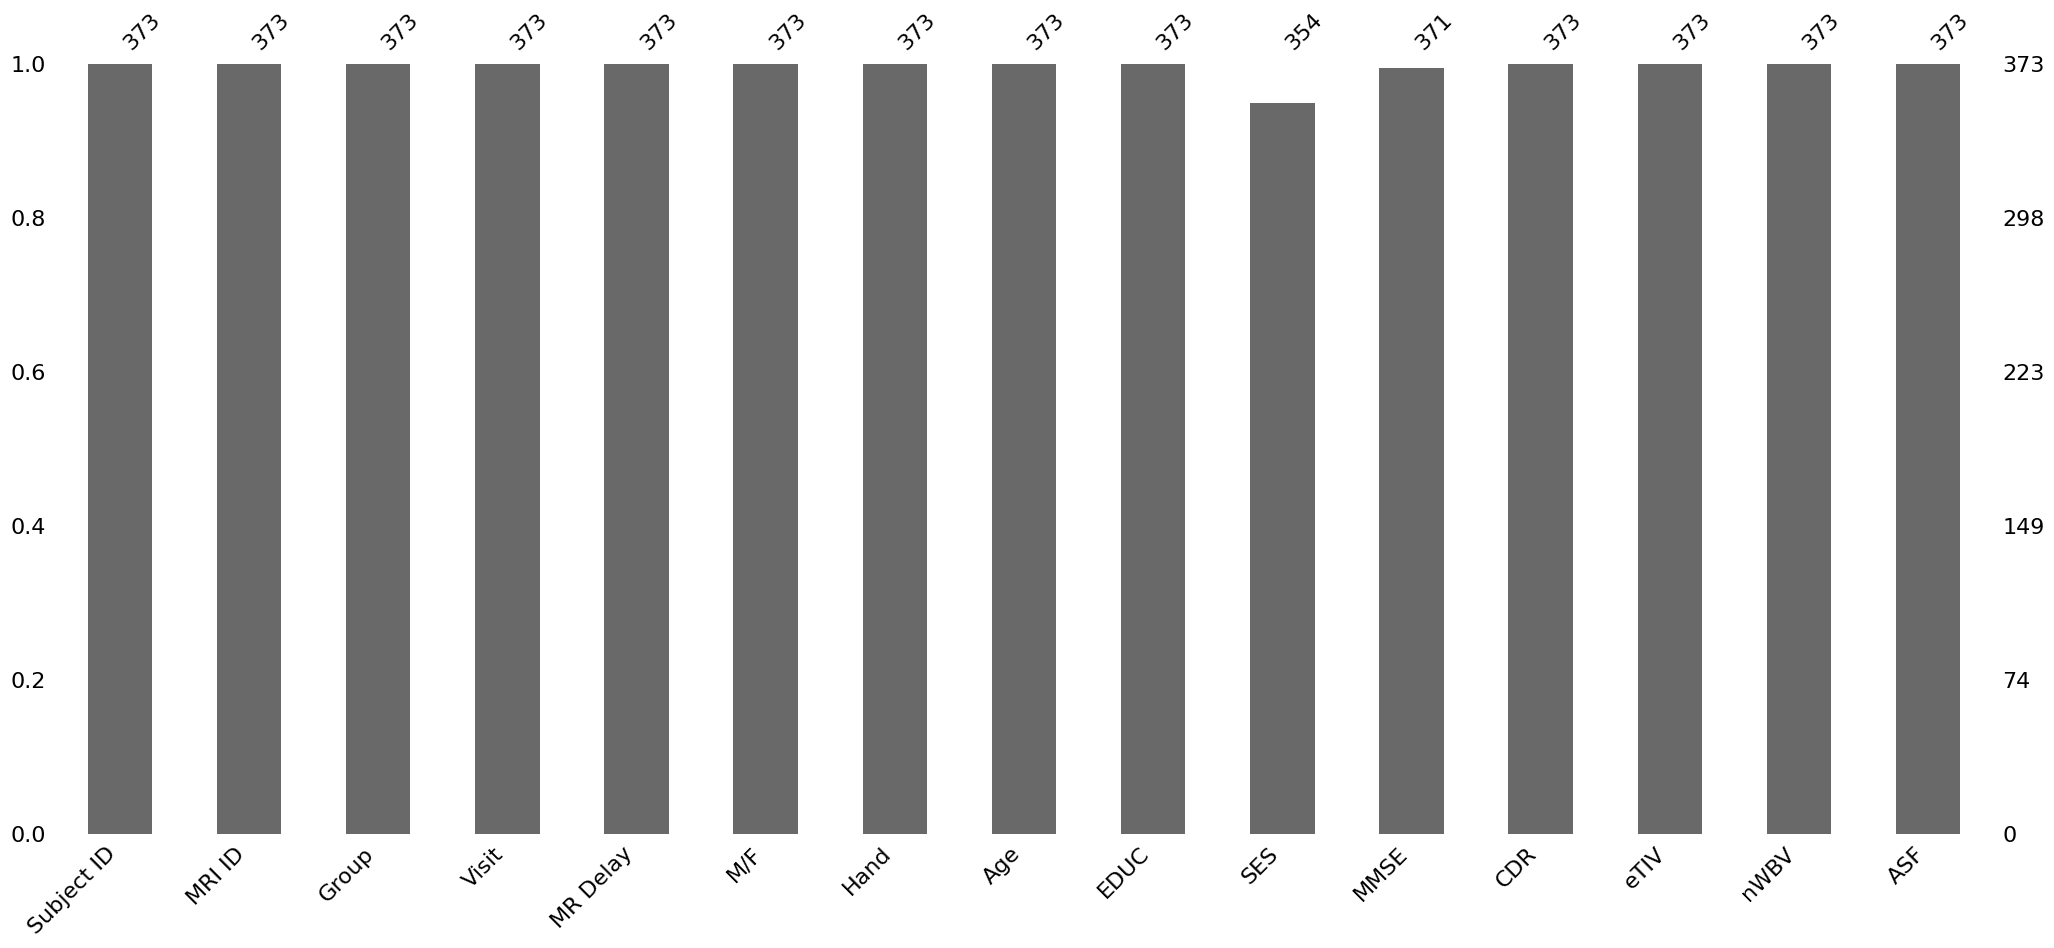

In [4]:
import missingno as msno
msno.bar(data)

In [5]:
#impute missing values with SimpleImputer using median value
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
data[['SES']] = imputer.fit_transform(data[['SES']])

In [6]:
# Drop the rows with the missing values
data = data.dropna(axis=0)
data

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [7]:
#let's check one more time to see if there are any more missing values
data.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [8]:
#drop redundant columns, like 'Hand'
data = data.drop(['Hand'], axis=1)
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,12,2.0,22.0,0.5,1698,0.701,1.034


# Treating 'Converted' as 'Demented'
Because the objective of this exercise isn't so much concerned with whether the patients' diagnosis has changed as whether they have dementia or not. So all groups labelled as 'Converted' will be treated as 'Demented'. 

In [9]:
#find 'converted'
data['Group'].value_counts()

Group
Nondemented    190
Demented       144
Converted       37
Name: count, dtype: int64

In [10]:
#Replace 'converted' with 'demented'
data['Group'] = data['Group'].replace(['Converted'], ['Demented'])

In [11]:
#count the new classes of our Groups now
data['Group'].value_counts()

Group
Nondemented    190
Demented       181
Name: count, dtype: int64

# Group EDA

<Axes: xlabel='Group', ylabel='count'>

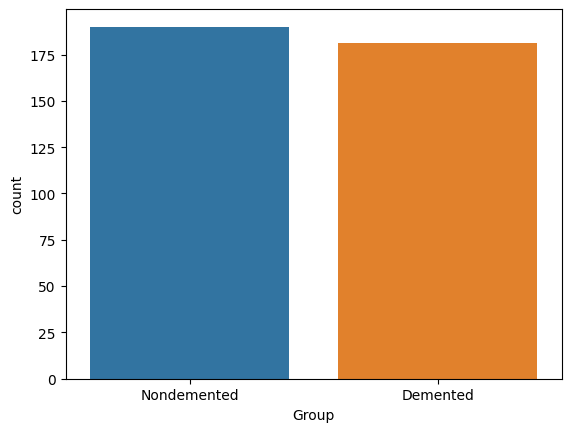

In [12]:
sns.countplot(x = 'Group', data = data)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

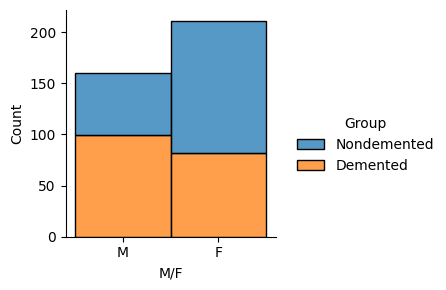

In [13]:
sns.displot(data, x='M/F', hue='Group', multiple='stack', height = 3)

# Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data['M/F'] = labelencoder.fit_transform(data['M/F'])
data['Group'] = labelencoder.fit_transform(data['Group'])
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,1,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,1,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,0,1,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,0,2,560,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,0,3,1895,1,80,12,2.0,22.0,0.5,1698,0.701,1.034


# Class Balancing

Group
1    190
0    181
Name: count, dtype: int64


<Axes: xlabel='Group', ylabel='count'>

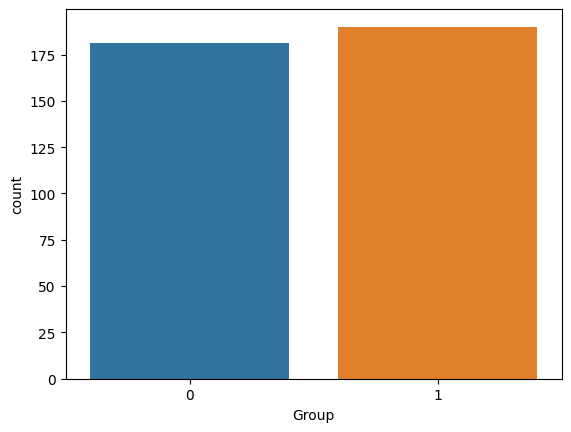

In [15]:
#before class balancing
print(data['Group'].value_counts())
sns.countplot(x = 'Group', data = data)

In [16]:
from collections import Counter
print(sorted(Counter(data['Group']).items()))

[(0, 181), (1, 190)]


In [17]:
#let's split the variables here for easier class balancing
x = data[['MR Delay','CDR','M/F', 'Age', 'EDUC','SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
y = data['Group']

In [18]:
#perform undersampling

from imblearn.under_sampling import NearMiss

nearmiss = NearMiss(version=2)
X_nearmiss, y_nearmiss = nearmiss.fit_resample(x, y)

# Check the number of records after undersampling
print(sorted(Counter(y_nearmiss).items()))

[(0, 181), (1, 181)]


Counter({0: 181, 1: 181})


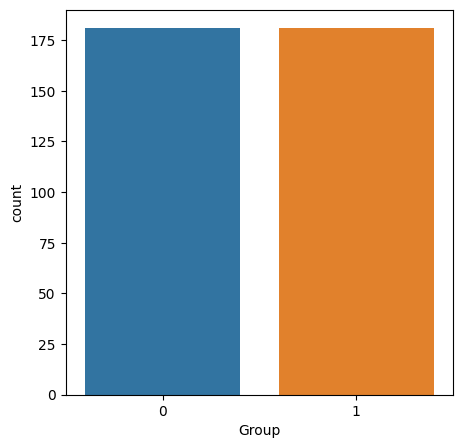

In [19]:
#after class balancing
plt.subplots(figsize=(5,5))
sns.countplot(x=y_nearmiss)
print(Counter(y_nearmiss))

# Model 1 - Random Forest with GridSearchCV

In [20]:
#setting IV and TV - For Random Forest
X = data[['MR Delay','CDR','M/F', 'Age', 'EDUC','SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
y = data['Group']

In [21]:
#data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [22]:
#Base model parameters used
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [23]:
# Base Model Fitting
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [24]:
#Get metrics
rf_acc = accuracy_score(y_test, y_pred)*100
rf_pre = precision_score(y_test,y_pred, average='micro')
rf_recall = recall_score(y_test, y_pred, average='micro')
rf_f1 = f1_score(y_test,y_pred, average='micro')

print("\nRF - Accuracy: {:.3f}.".format(rf_acc))
print("RF - Precision: {:.3f}.".format(rf_pre))
print("RF - Recall: {:.3f}.".format(rf_recall))
print("RF - F1_Score: {:.3f}.".format(rf_f1))
print('\n Clasification Report - Base Model:\n', classification_report(y_test,y_pred))


RF - Accuracy: 94.667.
RF - Precision: 0.947.
RF - Recall: 0.947.
RF - F1_Score: 0.947.

 Clasification Report - Base Model:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        36
           1       0.91      1.00      0.95        39

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75



In [25]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.round(2)})
print(rf_df.head())

     Actual  Predicted
207       0          0
82        0          1
185       0          0
370       1          1
65        1          1


In [26]:
#hyperparameter tuning

from  numpy import arange

parameters = {'criterion': ['gini', 'entropy'],
              'class_weight': ['balanced', 'balanced_subsample', None],
              'n_estimators': arange(100, 1000, 100), #number of trees in random forest
              'max_features': ['sqrt'], 
              'max_depth': arange(10, 110, 10),
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]}

In [27]:
#RF - Random Search CV with Class Balancing
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = parameters, n_iter = 100, cv = 5, verbose = 2)

#Fit the random search model
rf_random.fit(X_train, y_train)

print("\nBest Parameters: ", rf_random.best_params_)
print("Best Scores: ", rf_random.best_score_)

y_pred_random = rf_random.predict(X_test)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=

In [28]:
#Get accuracy score
rf_acc_random = accuracy_score(y_test, y_pred_random)*100
rf_pre_random = precision_score(y_test, y_pred_random, average='micro')
rf_recall_random = recall_score(y_test, y_pred_random, average='micro')
rf_f1_random = f1_score(y_test, y_pred_random, average='micro')

print("\nRF - Accuracy: {:.3f}.".format(rf_acc_random))
print("RF - Precision: {:.3f}.".format(rf_pre_random))
print("RF - Recall: {:.3f}.".format(rf_recall_random))
print("RF - F1_Score: {:.3f}.".format(rf_f1_random))
print('\n Clasification Report:\n', classification_report(y_test,y_pred_random))
print()

df_random = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_random.round(2)})
print(df_random.head())


RF - Accuracy: 94.667.
RF - Precision: 0.947.
RF - Recall: 0.947.
RF - F1_Score: 0.947.

 Clasification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        36
           1       0.91      1.00      0.95        39

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75


     Actual  Predicted
207       0          0
82        0          1
185       0          0
370       1          1
65        1          1


In [29]:
#fit random forest model with best parameters
best_rf_model = RandomForestClassifier(n_estimators= 800, min_samples_split= 5, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 30, criterion='gini', class_weight=None, bootstrap=False)
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)

# Get the accuracy score
rf_t_acc = accuracy_score(y_test, y_pred)*100
rf_t_pre = precision_score(y_test, y_pred, average='micro')
rf_t_recall = recall_score(y_test, y_pred, average='micro')
rf_t_f1_ = f1_score(y_test, y_pred, average='micro')

print("\nRF - Accuracy: {:.3f}.".format(rf_t_acc))
print("RF - Precision: {:.3f}.".format(rf_t_pre))
print("RF - Recall: {:.3f}.".format(rf_t_recall))
print("RF - F1_Score: {:.3f}.".format(rf_t_f1_))
print ('\n Clasification Report:\n', classification_report(y_test,y_pred))


RF - Accuracy: 94.667.
RF - Precision: 0.947.
RF - Recall: 0.947.
RF - F1_Score: 0.947.

 Clasification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        36
           1       0.91      1.00      0.95        39

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75



In [30]:
#let's compare RF model results before and after tuning
rf_metrics = {'metric': ['accuracy','precision','recall','f1'],
          'Base RF model': [rf_acc,rf_pre, rf_recall, rf_f1],
          'Tuned RF model': [rf_t_acc,rf_t_pre,rf_t_recall,rf_t_f1_]}

rf_compare_df = pd.DataFrame(rf_metrics)
print(rf_compare_df)

      metric  Base RF model  Tuned RF model
0   accuracy      94.666667       94.666667
1  precision       0.946667        0.946667
2     recall       0.946667        0.946667
3         f1       0.946667        0.946667


# Identifying the important features

          Importance
MR Delay    0.025533
CDR         0.590567
M/F         0.016525
Age         0.030424
EDUC        0.020387
SES         0.017792
MMSE        0.160043
eTIV        0.036931
nWBV        0.063406
ASF         0.038393


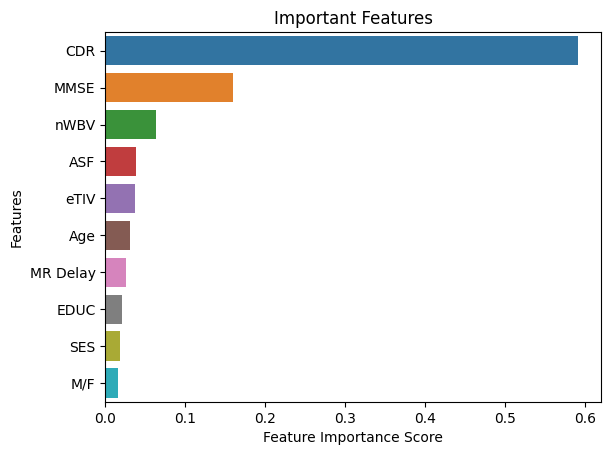

In [31]:
importance = best_rf_model.feature_importances_
importance_df = pd.DataFrame(importance, index=X_train.columns,columns=["Importance"])
print(importance_df)

import matplotlib.pyplot as plt
feature_imp = pd.Series(best_rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()

# Model 2 - MLP Classifier with GridSearchCV
This time, the data is also normalized to see what effects it has on model performance.

In [32]:
#setting IV and TV - for ANN and XGBoost
X = data[['MR Delay','CDR','M/F', 'Age', 'EDUC','SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
y = data['Group']

In [33]:
#normalize data
from sklearn.preprocessing import normalize

X = normalize(X, axis=0)
print("Examples of X Normalised\n", X[:3])

Examples of X Normalised
 [[0.         0.         0.07905694 0.05835836 0.04880835 0.03874194
  0.05080972 0.06876915 0.04946733 0.03815367]
 [0.02727152 0.         0.07905694 0.05902914 0.04880835 0.03874194
  0.05645524 0.06935751 0.04840123 0.03785121]
 [0.         0.05530013 0.07905694 0.05030893 0.04183573 0.03874194
  0.04328235 0.0580748  0.05231028 0.04519676]]


In [34]:
#data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [35]:
#Base Model Building - MLP with 1 layer
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=2000)

mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

In [36]:
mlp_acc = accuracy_score(y_test, y_pred)*100
mlp_pre = precision_score(y_test, y_pred, average='micro')
mlp_recall = recall_score(y_test, y_pred, average='micro')
mlp_f1 = f1_score(y_test, y_pred, average='micro')

print("MLP - Accuracy: {:.3f}.".format(mlp_acc))
print("MLP - Precision: {:.3f}.".format(mlp_pre))
print("MLP - Recall: {:.3f}.".format(mlp_recall))
print("MLP - F1_Score: {:.3f}.".format(mlp_f1))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print ('\n Clasification Report:\n', classification_report(y_test,y_pred))

MLP - Accuracy: 94.667.
MLP - Precision: 0.947.
MLP - Recall: 0.947.
MLP - F1_Score: 0.947.

Confusion Matrix: 
 [[32  4]
 [ 0 39]]

 Clasification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        36
           1       0.91      1.00      0.95        39

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75



In [37]:
#Base Model Fitting - MLP with 2 Hidden Layers
mlp2 = MLPClassifier(max_iter= 2000, hidden_layer_sizes=(200, 600)) #specfies the number of neurons in each layer

mlp2.fit(X_train,y_train)
y_pred2 = mlp2.predict(X_test)

mlp2_acc = accuracy_score(y_test, y_pred2)*100
mlp2_pre = precision_score(y_test, y_pred2, average='micro')
mlp2_recall = recall_score(y_test, y_pred2, average='micro')
mlp2_f1 = f1_score(y_test, y_pred2, average='micro')

print("MLP - Accuracy: {:.3f}.".format(mlp2_acc))
print("MLP - Precision: {:.3f}.".format(mlp2_pre))
print("MLP - Recall: {:.3f}.".format(mlp2_recall))
print("MLP - F1_Score: {:.3f}.".format(mlp2_f1))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred2))
print ('\n Clasification Report:\n', classification_report(y_test,y_pred2))

MLP - Accuracy: 94.667.
MLP - Precision: 0.947.
MLP - Recall: 0.947.
MLP - F1_Score: 0.947.

Confusion Matrix: 
 [[32  4]
 [ 0 39]]

 Clasification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        36
           1       0.91      1.00      0.95        39

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75



In [38]:
#no difference if it's 1 or 2 hidden layers
#to keep it simple, we'll use 1 hidden layer MLP for hyperparameter tuning
#This time with use SKLearn Tuner from Keras Tuner  

from sklearn.neural_network import MLPClassifier
import keras_tuner as kt
from sklearn.model_selection import StratifiedKFold

In [39]:
# Define the build_model function
def build_model(hp):
    model = MLPClassifier(
        hidden_layer_sizes=(100,),  # Keeping it fixed as you may want to tune it later
        max_iter=2500,
        activation=hp.Choice('activation', ['identity', 'logistic', 'tanh', 'relu']),
        solver=hp.Choice('solver', ['lbfgs', 'sgd', 'adam']),
        learning_rate=hp.Choice('learning_rate', ['constant', 'invscaling', 'adaptive']),
        random_state=hp.Int('random_state', min_value=0, max_value=10, step=1)
    )
    return model

X_train = np.array(X_train) if not isinstance(X_train, (np.ndarray, pd.DataFrame)) else X_train
y_train = np.array(y_train) if not isinstance(y_train, (np.ndarray, pd.DataFrame)) else y_train

# Initialize the tuner
tuner = kt.SklearnTuner(
    oracle=kt.oracles.BayesianOptimizationOracle(
        objective=kt.Objective('score', 'max'),
        max_trials=3
    ),
    hypermodel=build_model,
    cv=StratifiedKFold(5),
    overwrite=True
)

# Perform the search
tuner.search(X_train, y_train)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
print(best_model)

Trial 3 Complete [00h 00m 01s]
score: 0.945819209039548

Best score So Far: 0.945819209039548
Total elapsed time: 00h 01m 17s
MLPClassifier(learning_rate='adaptive', max_iter=2500, random_state=4)


In [40]:
#Tuned MLP-ANN Classifier with best parameters
best_mlp_model = MLPClassifier(learning_rate='invscaling', max_iter=2500, random_state=8,solver='lbfgs')

best_mlp_model.fit(X_train,y_train)
y_pred_best = best_mlp_model.predict(X_test)

mlp_t_acc = accuracy_score(y_test, y_pred_best)*100
mlp_t_pre = precision_score(y_test, y_pred_best, average='micro')
mlp_t_recall = recall_score(y_test, y_pred_best, average='micro')
mlp_t_f1 = f1_score(y_test, y_pred_best, average='micro')

print("MLP - Accuracy: {:.3f}.".format(mlp_t_acc))
print("MLP - Precision: {:.3f}.".format(mlp_t_pre))
print("MLP - Recall: {:.3f}.".format(mlp_t_recall))
print("MLP - F1_Score: {:.3f}.".format(mlp_t_f1))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_best))
print('\n Clasification Report:\n', classification_report(y_test,y_pred_best))

MLP - Accuracy: 90.667.
MLP - Precision: 0.907.
MLP - Recall: 0.907.
MLP - F1_Score: 0.907.

Confusion Matrix: 
 [[32  4]
 [ 3 36]]

 Clasification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.90      0.92      0.91        39

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75



In [41]:
#let's compare MLP-ANN model results before and after tuning
mlp_metrics = {'metric': ['accuracy','precision','recall','f1'],
          'Base MLP model': [mlp_acc,mlp_pre, mlp_recall, mlp_f1],
          'Tuned MLP model': [mlp_t_acc,mlp_t_pre,mlp_t_recall,mlp_t_f1]}

mlp_compare_df = pd.DataFrame(mlp_metrics)
print(mlp_compare_df)

      metric  Base MLP model  Tuned MLP model
0   accuracy       94.666667        90.666667
1  precision        0.946667         0.906667
2     recall        0.946667         0.906667
3         f1        0.946667         0.906667


# Model 3 - XGBoost with GridSearchCV

In [42]:
X = data[['MR Delay','CDR','M/F', 'Age', 'EDUC','SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
y = data['Group']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [44]:
#normalize data again
from sklearn.preprocessing import normalize
X = normalize(X, axis=0)
print("Examples of X Normalised\n", X[:3])

Examples of X Normalised
 [[0.         0.         0.07905694 0.05835836 0.04880835 0.03874194
  0.05080972 0.06876915 0.04946733 0.03815367]
 [0.02727152 0.         0.07905694 0.05902914 0.04880835 0.03874194
  0.05645524 0.06935751 0.04840123 0.03785121]
 [0.         0.05530013 0.07905694 0.05030893 0.04183573 0.03874194
  0.04328235 0.0580748  0.05231028 0.04519676]]


In [45]:
X_train = np.array(X_train) if not isinstance(X_train, (np.ndarray, pd.DataFrame)) else X_train
y_train = np.array(y_train) if not isinstance(y_train, (np.ndarray, pd.DataFrame)) else y_train

In [46]:
#base model fitting
from xgboost import XGBClassifier
XGB = XGBClassifier()

XGB.fit(X_train,y_train)
y_pred = XGB.predict(X_test)

# Get the accuracy score
XGB_acc = accuracy_score(y_test, y_pred)*100
XGB_pre = precision_score(y_test, y_pred, average='micro')
XGB_recall = recall_score(y_test, y_pred, average='micro')
XGB_f1 = f1_score(y_test, y_pred, average='micro')

print("XGB - Accuracy: {:.3f}.".format(XGB_acc))
print("XGB - Precision: {:.3f}.".format(XGB_pre))
print("XGB - Recall: {:.3f}.".format(XGB_recall))
print("XGB - F1_Score: {:.3f}.".format(XGB_f1))

XGB - Accuracy: 90.667.
XGB - Precision: 0.907.
XGB - Recall: 0.907.
XGB - F1_Score: 0.907.


In [47]:
#hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05],
}

XGB_SE = GridSearchCV(estimator=XGB, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
XGB_SE.fit(X_train,y_train)
best_parameters = XGB_SE.best_params_
best_score = XGB_SE.best_score_
print(best_parameters)
print(best_score)

#test acc
y_pred = XGB_SE.predict(X_test)

# Get the accuracy score
XGB_acc = accuracy_score(y_test, y_pred)
XGB_pre = precision_score(y_test, y_pred, average='micro')
XGB_recall = recall_score(y_test, y_pred, average='micro')
XGB_f1 = f1_score(y_test, y_pred, average='micro')

print("XGB - Accuracy: {:.3f}.".format(XGB_acc))
print("XGB - Precision: {:.3f}.".format(XGB_pre))
print("XGB - Recall: {:.3f}.".format(XGB_recall))
print("XGB - F1_Score: {:.3f}.".format(XGB_f1))

Fitting 5 folds for each of 4800 candidates, totalling 24000 fits
{'colsample_bytree': 0.6, 'gamma': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.005, 'subsample': 0.9}
0.9525988700564971
XGB - Accuracy: 0.933.
XGB - Precision: 0.933.
XGB - Recall: 0.933.
XGB - F1_Score: 0.933.


In [48]:
#let's fit the best parameters to the XGBoost model
best_XGB_model = XGBClassifier(colsample_bytree= 0.6, gamma= 0.2, max_depth= 5, min_child_weight= 1, reg_alpha= 0.005, subsample= 0.9)

best_XGB_model.fit(X_train,y_train)
y_pred_best = best_XGB_model.predict(X_test)

# Get the accuracy score
XGB_t_acc = accuracy_score(y_test, y_pred_best)*100
XGB_t_pre = precision_score(y_test, y_pred_best, average='micro')
XGB_t_recall = recall_score(y_test, y_pred_best, average='micro')
XGB_t_f1 = f1_score(y_test, y_pred_best, average='micro')

print("XGB - Accuracy: {:.3f}.".format(XGB_t_acc))
print("XGB - Precision: {:.3f}.".format(XGB_t_pre))
print("XGB - Recall: {:.3f}.".format(XGB_t_recall))
print("XGB - F1_Score: {:.3f}.".format(XGB_t_f1))

XGB - Accuracy: 93.333.
XGB - Precision: 0.933.
XGB - Recall: 0.933.
XGB - F1_Score: 0.933.


In [49]:
#let's compare XG-Boost model results before and after tuning
xgb_metrics = {'metric': ['accuracy','precision','recall','f1'],
          'Base XGB model': [XGB_acc,XGB_pre, XGB_recall, XGB_f1],
          'Tuned XBG model': [XGB_t_acc,XGB_t_pre,XGB_t_recall,XGB_t_f1]}

xgb_compare_df = pd.DataFrame(xgb_metrics)
print(xgb_compare_df)

      metric  Base XGB model  Tuned XBG model
0   accuracy        0.933333        93.333333
1  precision        0.933333         0.933333
2     recall        0.933333         0.933333
3         f1        0.933333         0.933333


# Summary of Models

In [50]:
results = [['Random Forest', rf_t_acc], ['MLP Classifier', mlp_t_acc], ['XGBoost', XGB_t_acc]]

# Create the pandas DataFrame
df = pd.DataFrame(results, columns=['Model', 'Accuracy'])

# print dataframe.
df.style.set_caption('Best Model Summary')

,Model,Accuracy
0,Random Forest,94.666667
1,MLP Classifier,90.666667
2,XGBoost,93.333333
